In [49]:
import pandas as pd
data  = pd.read_excel('2017捷運人流_日期時間合併.xlsx', engine='openpyxl')
for i in range(18,24):
    dataset = pd.read_excel(f'20{i}捷運人流_日期時間合併.xlsx', engine='openpyxl')
    data = pd.concat([data,dataset],ignore_index=True)
print(data.shape)

(5524168, 5)


# 資料預處理

In [80]:
data['Date'] = pd.to_datetime(data['Date'])
datasets = data.drop('出站',axis=1)
selected_station = ['幸福','新北產業園區','新埔民生','板橋','板新','中原','橋和','中和','景平','秀朗橋','十四張','Y板橋']
# filtered_data = datasets[datasets['Station'].isin(selected_station)]
datasets = datasets[~datasets['Station'].isin(selected_station)]  #  ~ 反向運算符號
datasets.dtypes

Date         datetime64[ns]
時段                    int64
Station              object
CrowdFlow             int64
dtype: object

In [81]:
# 下關於星期的標籤
datasets['Weekday'] = data['Date'].dt.weekday
weekday = ['Mon','Tue','Wed','Thr','Fri','Sat','Sun']
datasets['Weekday'] = datasets['Weekday'].map(lambda x: weekday[x])
datasets.head()

,Date,時段,Station,CrowdFlow,Weekday
0,2017-01-01,0,BL板橋,361,Sun
1,2017-01-01,0,七張,56,Sun
2,2017-01-01,0,三和國中,52,Sun
3,2017-01-01,0,三民高中,38,Sun
4,2017-01-01,0,三重,35,Sun


In [83]:
# 針對站點下路線標籤
# R為淡水信義線、BR文湖線、G為松山新店線、O為中和新蘆線、BL為板南線、
station_to_routes = {
'動物園':'BR','木柵':'BR','萬芳社區':'BR','萬芳醫院':'BR','辛亥':'BR','麟光':'BR','六張犁':'BR','科技大樓':'BR','大安':['BR','R'],'忠孝復興':['BR','BL'],'南京復興':['BR','G'],'中山國中':'BR','松山機場':'BR','大直':'BR','劍南路':'BR','西湖':'BR','港墘':'BR','文德':'BR','內湖':'BR','大湖公園':'BR','葫洲':'BR','東湖':'BR','南港軟體園區':'BR','南港展覽館':['BR','BL'],'象山':'R','台北101/世貿':'R','世貿':'R','信義安和':'R','大安森林公園':'R','東門':['R','O'],'中正紀念堂':['R','G'],'台大醫院':'R','台北車站':['R','BL'],'中山':['R','G'],'雙連':'R','民權西路':['R','O'],'圓山':'R','劍潭':'R','士林':'R','芝山':'R','明德':'R','石牌':'R','唭哩岸':'R','奇岩':'R','北投':'R','新北投':'R','復興崗':'R','忠義':'R','關渡':'R','竹圍':'R','紅樹林':'R','淡水':'R','頂埔':'BL','永寧':'BL','土城':'BL','海山':'BL','亞東醫院':'BL','府中':'BL','BL板橋':'BL','新埔':'BL','江子翠':'BL','龍山寺':'BL','西門':['BL','G'],'善導寺':'BL','忠孝新生':['BL','O'],'忠孝敦化':'BL','國父紀念館':'BL','市政府':'BL','永春':'BL','後山埤':'BL','昆陽':'BL','南勢角':'O','景安':'O','永安市場':'O','頂溪':'O','古亭':['O','G'],'忠孝新生':'O','松江南京':['O','G'],'行天宮':'O','中山國小':'O','大橋頭站':'O','台北橋':'O','菜寮':'O','三重':'O','先嗇宮':'O','頭前庄':'O','新莊':'O','輔大':'O','丹鳳':'O','迴龍':'O','三重國小':'O','三和國中':'O','徐匯中學':'O','三民高中':'O','蘆洲':'O','新店':'G','新店區公所':'G','七張':'G','小碧潭':'G','大坪林':'G','景美':'G','萬隆':'G','公館':'G','台電大樓':'G','小南門':'G','北門':'G','台北小巨蛋':'G','南京三民':'G','松山':'G','南港':'BL'
}
datasets['Routes'] = datasets['Station'].map(station_to_routes)
datasets['Routes'].isna().sum()

0

In [98]:
datasets[datasets['Station'] == '中正紀念堂']

,Date,時段,Station,CrowdFlow,Weekday,Routes
9,2017-01-01,0,中正紀念堂,126,Sun,"[R, G]"
117,2017-01-01,1,中正紀念堂,2,Sun,"[R, G]"
225,2017-01-01,6,中正紀念堂,281,Sun,"[R, G]"
333,2017-01-01,7,中正紀念堂,907,Sun,"[R, G]"
441,2017-01-01,8,中正紀念堂,915,Sun,"[R, G]"
...,...,...,...,...,...,...
5523585,2023-04-30,19,中正紀念堂,857,Sun,"[R, G]"
5523704,2023-04-30,20,中正紀念堂,654,Sun,"[R, G]"
5523823,2023-04-30,21,中正紀念堂,895,Sun,"[R, G]"
5523942,2023-04-30,22,中正紀念堂,733,Sun,"[R, G]"


In [117]:
# 國定假日
hoilday = pd.read_excel('holiday_Calendar.xlsx')
hoilday["Date"] = pd.to_datetime(hoilday["年"].astype(str) + "-" + hoilday["月"].astype(str) + "-" + hoilday["日"].astype(str))
hoildays = hoilday["Date"]
datasets['Hoilday'] = datasets['Date'].isin(hoildays)
datasets[datasets['Hoilday'] == False]

,Date,時段,Station,CrowdFlow,Weekday,Routes,Hoilday
4428,2017-01-03,0,BL板橋,168,Tue,BL,False
4429,2017-01-03,0,七張,43,Tue,G,False
4430,2017-01-03,0,三和國中,31,Tue,O,False
4431,2017-01-03,0,三民高中,21,Tue,O,False
4432,2017-01-03,0,三重,28,Tue,O,False
...,...,...,...,...,...,...,...
5519165,2023-04-28,23,頂埔,49,Fri,BL,False
5519166,2023-04-28,23,頂溪,424,Fri,O,False
5519167,2023-04-28,23,頭前庄,85,Fri,O,False
5519168,2023-04-28,23,麟光,34,Fri,BR,False


In [87]:
data_station = datasets.groupby('Station').sum('CrowFlow').drop('時段',axis=1)
data_station

,CrowdFlow
Station,
BL板橋,82335950
七張,33492866
三和國中,25374997
三民高中,24654717
三重,13796555
...,...
頂埔,17822602
頂溪,72323868
頭前庄,11450310


In [93]:
print(data_station.describe().astype(int))
data_station[(data_station["CrowdFlow"] >= 51992967)]

       CrowdFlow
count        108
mean    39832516
std     35841951
min      5168564
25%     19689344
50%     29460190
75%     51992967
max    305642552


,CrowdFlow
Station,
BL板橋,82335950
中山,86738140
中正紀念堂,55757741
公館,59439297
劍潭,64554127
南京復興,74433768
南港展覽館,60450619
古亭,64958421
台北101/世貿,62961938


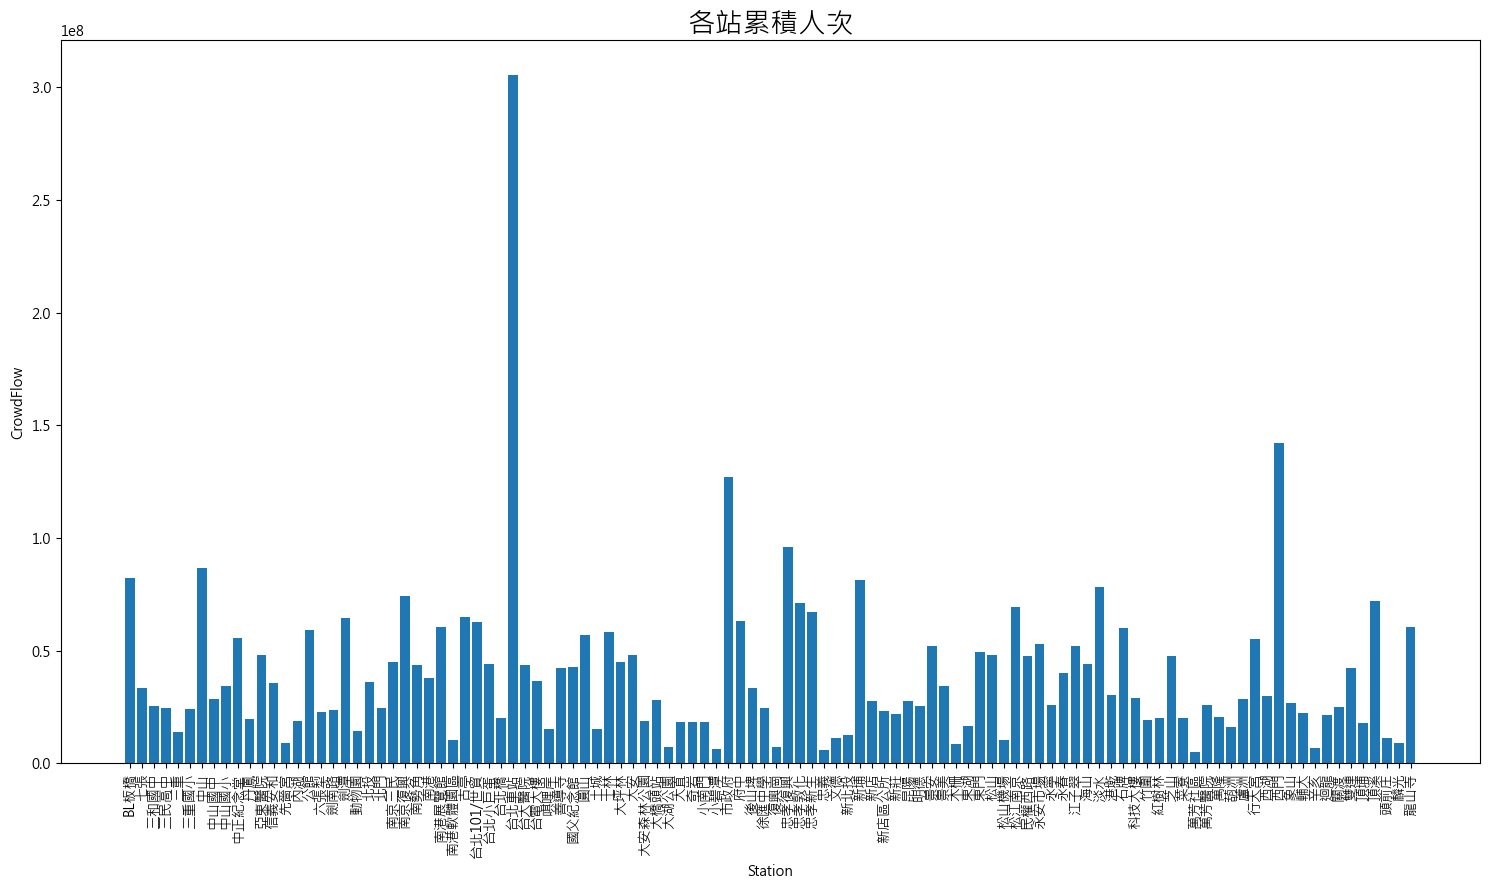

In [94]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='Microsoft JhengHei')

x = data_station['CrowdFlow'].values
stations = data_station.index

plt.figure(figsize=(15, 9))

plt.title('各站累積人次', fontsize=20)
plt.bar(stations, x)
plt.xlabel('Station')
plt.ylabel('CrowdFlow')
plt.xticks(range(len(stations)), stations, rotation=90)
plt.subplots_adjust(bottom=0.3)

plt.tight_layout()
plt.show()

### 可以發現台北車站的人數遠超其他站點，其原因我想肯定與該站還有台鐵高鐵及轉運站有一定關係

In [90]:
data_station['CrowdFlow'].describe().astype(int)

count          108
mean      39832516
std       35841951
min        5168564
25%       19689344
50%       29460190
75%       51992967
max      305642552
Name: CrowdFlow, dtype: int32

In [95]:
data_time = datasets.groupby('時段').sum('CrowdFlow')
data_time = data_time.drop([1, 2, 3, 4, 5])
data_time

# 凌晨時段有人是因為當天為跨年
# 根據台北捷運官方網站，正常來說首班車發車為早上六點，末班車為晚上十二點發車，所以我們的分析的部分只抓[0,6~23]這個時段的人流

,CrowdFlow
時段,
0,28168386
6,58123348
7,227559171
8,415596862
9,257553445
10,185975736
11,187345485
12,203446613
13,215141815


In [96]:
data_time['CrowdFlow'].describe().astype(int)

count           19
mean     226303266
std      110729006
min       28168386
25%      187093323
50%      215141815
75%      252026556
max      469447772
Name: CrowdFlow, dtype: int32

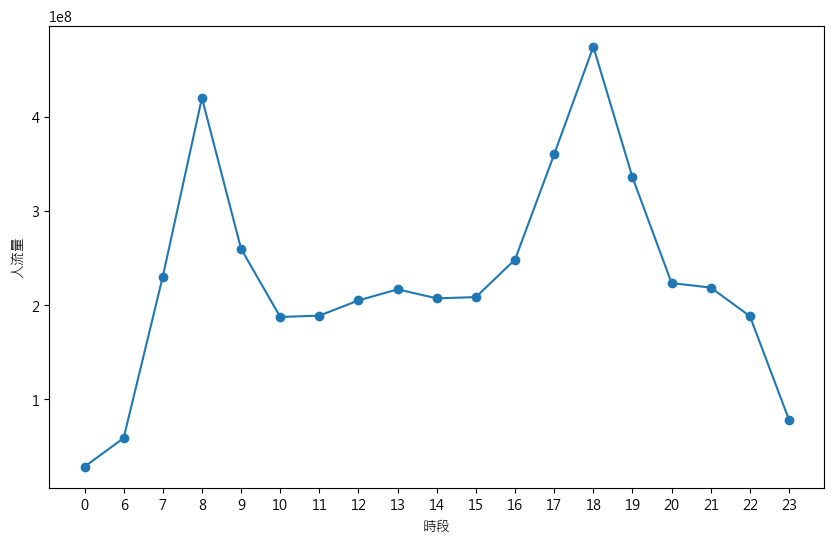

'\n還未區分假日平日的狀況下，可發先時段早上為8點至9點，晚上的4點一路到9點的累積人流都高於平均數\n傍晚時段比早上時段明顯還要多人，可約略猜測不論早上幾點出門，回去的時間其實整個大台北地區還是相當集中的\n'

In [17]:
x = data_time.index.astype(str)  
y = data_time['CrowdFlow']  

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o')
plt.xlabel('時段')
plt.ylabel('人流量')
plt.xticks(x)


plt.show()

'''
還未區分假日平日的狀況下，可發先時段早上為8點至9點，晚上的4點一路到9點的累積人流都高於平均數
傍晚時段比早上時段明顯還要多人，可約略猜測不論早上幾點出門，回去的時間其實整個大台北地區還是相當集中的
'''


In [18]:
data_date = data.groupby('Date').sum('CrowFlow')
data_date = data_date.drop(data_date.index[-1]).drop('時段',axis=1)
data_date.describe().astype(int)

,CrowdFlow
count,2310
mean,1878127
std,456553
min,149899
25%,1678632
50%,2025893
75%,2182384
max,3058226


In [19]:
data_date

,CrowdFlow
Date,
2017-01-01,1881644
2017-01-02,1611187
2017-01-03,2085175
2017-01-04,2101443
2017-01-05,2120337
...,...
2023-04-25,2079198
2023-04-26,2096033
2023-04-27,2133715


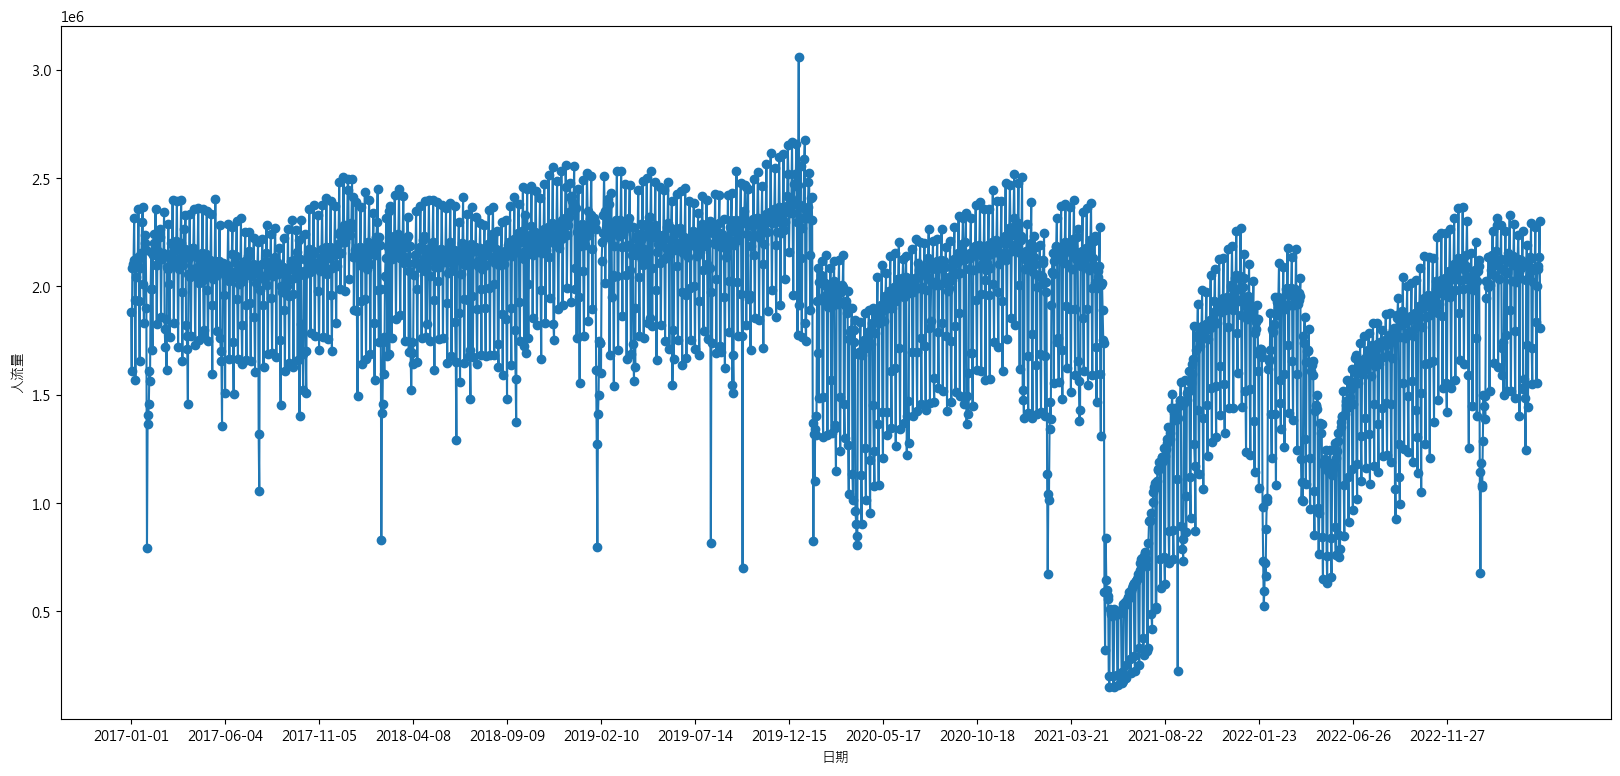

In [20]:
x = data_date.index.astype(str)  
y = data_date['CrowdFlow']
plt.figure(figsize=(20, 9))
plt.plot(x, y, marker='o')
plt.ylabel('人流量')
plt.xlabel('日期')

num_ticks = 15
step = len(x) // num_ticks
plt.xticks(x[::step])

plt.show() 

In [21]:
data['Date'] = pd.to_datetime(data['Date'])
data['Weekday'] = data['Date'].dt.weekday
weekday = ['Mon','Tue','Wed','Thr','Fri','Sat','Sun']
data['Weekday'] = data['Weekday'].map(lambda x: weekday[x])
data_weekday = data.groupby('Weekday').sum('CrowdFlow').drop('時段',axis=1)
data_weekday.describe().astype(int)


,CrowdFlow
count,7
mean,620007087
std,71026375
min,483855604
25%,599194875
50%,646511159
75%,657340033
max,696613031


In [22]:
data_weekday

,CrowdFlow
Weekday,
Fri,696613031
Mon,626598507
Sat,571791244
Sun,483855604
Thr,658856858
Tue,646511159
Wed,655823208


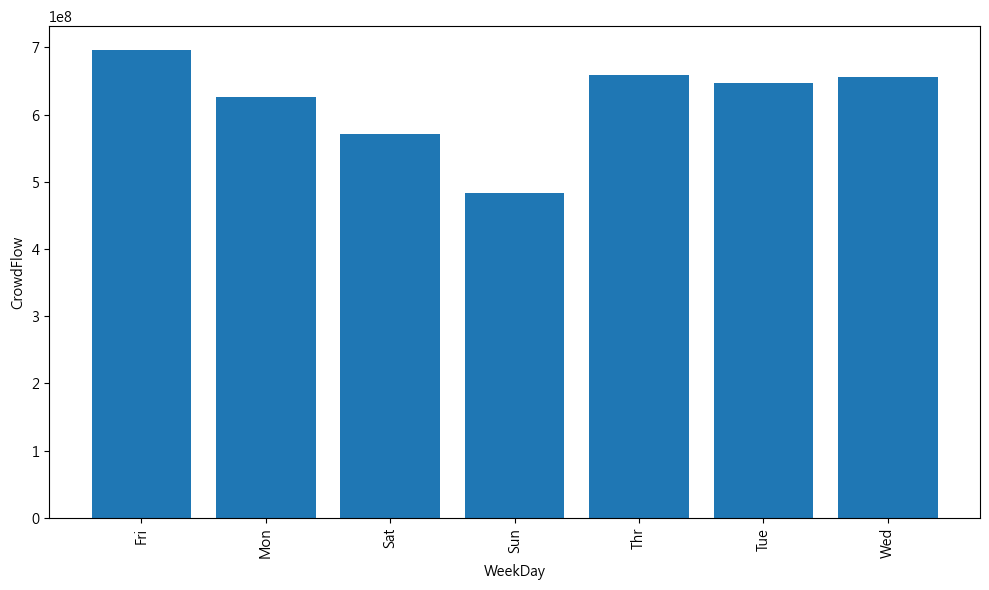

In [23]:
x = data_weekday['CrowdFlow'].values
weekday = data_weekday.index

plt.figure(figsize=(10, 6))

plt.bar(weekday, x)
plt.xlabel('WeekDay')
plt.ylabel('CrowdFlow')
plt.xticks(range(len(weekday)), weekday, rotation=90)
plt.subplots_adjust(bottom=0.3)

plt.tight_layout()
plt.show()

In [24]:
data['CrowdFlow'].describe().astype(int)

count    5524168
mean         785
std         1155
min            0
25%          136
50%          434
75%          987
max        21066
Name: CrowdFlow, dtype: int32

In [25]:
data['peak'] = data['時段'].map(lambda x:True if x in (7,8,17,18,19) else False)
# 尖峰時段班次較多
data

,Date,時段,Station,出站,CrowdFlow,Weekday,crowd,peak
0,2017-01-01,0,BL板橋,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,361,Sun,中度擁擠,False
1,2017-01-01,0,七張,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,56,Sun,低度擁擠,False
2,2017-01-01,0,三和國中,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,52,Sun,低度擁擠,False
3,2017-01-01,0,三民高中,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,38,Sun,低度擁擠,False
4,2017-01-01,0,三重,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,35,Sun,低度擁擠,False
...,...,...,...,...,...,...,...,...
5524163,2023-04-30,23,頂埔,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,53,Sun,低度擁擠,False
5524164,2023-04-30,23,頂溪,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,317,Sun,中度擁擠,False
5524165,2023-04-30,23,頭前庄,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,68,Sun,低度擁擠,False
5524166,2023-04-30,23,麟光,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,24,Sun,低度擁擠,False


In [26]:
peek_sample = data[(data['peak']== True) & (data['crowd'] == '低度擁擠')]
peek_sample

,Date,時段,Station,出站,CrowdFlow,Weekday,crowd,peak
328,2017-01-01,7,三重,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,105,Sun,低度擁擠,True
337,2017-01-01,7,先嗇宮,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,75,Sun,低度擁擠,True
338,2017-01-01,7,內湖,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,123,Sun,低度擁擠,True
341,2017-01-01,7,劍南路,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,130,Sun,低度擁擠,True
343,2017-01-01,7,動物園,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,65,Sun,低度擁擠,True
...,...,...,...,...,...,...,...,...
5523657,2023-04-30,19,橋和,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,87,Sun,低度擁擠,True
5523667,2023-04-30,19,秀朗橋,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,80,Sun,低度擁擠,True
5523673,2023-04-30,19,萬芳社區,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,51,Sun,低度擁擠,True
5523683,2023-04-30,19,辛亥,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,76,Sun,低度擁擠,True


In [27]:
data.dtypes

Date         datetime64[ns]
時段                    int64
Station              object
出站                   object
CrowdFlow             int64
Weekday              object
crowd                object
peak                   bool
dtype: object